In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwd()

'E:\\Insofe\\Python Lab'

In [3]:
os.chdir("E:\INSOFE\cute4")

In [4]:
os.getcwd()

'E:\\INSOFE\\cute4'

In [5]:
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

C:\Users\prash\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Data Read and Sanitizing the Input

In [6]:
input_file = codecs.open("all_tickets-1551435513304.csv", "r",encoding='utf-8', errors='replace')
output_file = open("all_tickets_relevant_cols_clean.csv", "w")

def sanitize_characters(raw, clean):    
    for line in input_file:
        out = line
        output_file.write(line)
sanitize_characters(input_file, output_file)

### Inspecting the Data

In [7]:
tickets = pd.read_csv("all_tickets-1551435513304.csv")
tickets.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [8]:
tickets.tail()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
48544,git space for a project issues with adding users,sent tuesday july re git space for hi got righ...,0,4,21,1,39,1,3
48545,error,sent july error hi guys can you help out with ...,0,4,9,41,10,2,3
48546,connection issues,sent tuesday july connection issues hello have...,0,5,32,0,32,2,3
48547,error cube reports,sent tuesday july error hello guys have receiv...,0,4,21,41,35,1,3
48548,running out on extensions,hello please be advised we running out extensi...,0,4,51,98,96,2,3


In [9]:
tickets.describe()

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
count,48549.000000,48549.000000,48549.000000,48549.000000,48549.000000,48549.000000,48549.000000
mean,0.713115,4.491153,11.614390,32.004634,49.482605,2.506066,3.677460
std,0.452312,1.103556,13.752707,33.602122,22.806100,0.855646,0.591513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,2.000000,7.000000,32.000000,2.000000,3.000000
50%,1.000000,4.000000,3.000000,21.000000,49.000000,3.000000,4.000000
75%,1.000000,5.000000,21.000000,53.000000,67.000000,3.000000,4.000000
max,1.000000,12.000000,58.000000,114.000000,102.000000,3.000000,4.000000


### Few Regular expressions to clean up data and saving it for later use

In [10]:
def standardize_body(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

tickets = standardize_body(tickets, "body")

tickets.to_csv("clean_data.csv")
tickets.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [11]:
clean_tickets = pd.read_csv("clean_data.csv")
clean_tickets.tail()

,Unnamed: 0,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
48544,48544,git space for a project issues with adding users,sent tuesday july re git space for hi got righ...,0,4,21,1,39,1,3
48545,48545,error,sent july error hi guys can you help out with ...,0,4,9,41,10,2,3
48546,48546,connection issues,sent tuesday july connection issues hello have...,0,5,32,0,32,2,3
48547,48547,error cube reports,sent tuesday july error hello guys have receiv...,0,4,21,41,35,1,3
48548,48548,running out on extensions,hello please be advised we running out extensi...,0,4,51,98,96,2,3


### Data Overview

In [12]:
clean_tickets.groupby("urgency").count()

,Unnamed: 0,title,body,ticket_type,category,sub_category1,sub_category2,business_service,impact
urgency,,,,,,,,,
0,1652,1648,1652,1652,1652,1652,1652,1652,1652
1,6748,6694,6748,6748,6748,6748,6748,6748,6748
2,5528,5462,5528,5528,5528,5528,5528,5528,5528
3,34621,34033,34621,34621,34621,34621,34621,34621,34621


### Data is clean, now it needs to be prepared

In [13]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

clean_tickets["tokens"] = clean_tickets["body"].apply(tokenizer.tokenize)
clean_tickets.head()

,Unnamed: 0,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,tokens
0,0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4,"[hi, since, recruiter, lead, permission, appro..."
1,1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4,"[icon, dear, please, setup, icon, per, icon, e..."
2,2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4,"[work, experience, user, hi, work, experience,..."
3,3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4,"[requesting, meeting, hi, please, help, follow..."
4,4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4,"[re, expire, days, hi, ask, help, update, pass..."


### Inspecting dataset to find Total Words, Max Sentence Length

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in clean_tickets["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_tickets["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

1925574 words total, with a vocabulary size of 12258
Max sentence length is 979


In [15]:
sentence_lengths = [len(tokens) for tokens in clean_tickets["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

1925574 words total, with a vocabulary size of 12258
Max sentence length is 979


In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

<Figure size 1000x1000 with 1 Axes>

##### Checking the Class balance

In [17]:
clean_tickets.urgency.value_counts()

3    34621
1     6748
2     5528
0     1652
Name: urgency, dtype: int64

###### Calculate the number of words in each body

In [18]:
clean_tickets['num_words'] = clean_tickets.body.apply(lambda x : len(x.split()))

In [19]:
clean_tickets.head()

,Unnamed: 0,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,tokens,num_words
0,0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4,"[hi, since, recruiter, lead, permission, appro...",12
1,1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4,"[icon, dear, please, setup, icon, per, icon, e...",15
2,2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4,"[work, experience, user, hi, work, experience,...",16
3,3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4,"[requesting, meeting, hi, please, help, follow...",11
4,4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4,"[re, expire, days, hi, ask, help, update, pass...",140


In [20]:
clean_tickets['num_words'].describe()

count    48549.000000
mean        39.662815
std         56.214280
min          1.000000
25%         13.000000
50%         23.000000
75%         41.000000
max        979.000000
Name: num_words, dtype: float64

#### Binning the No of Words for better understanding of how the words are ditributed

In [21]:
bins=[0,50,75, np.inf]
clean_tickets['bins']=pd.cut(clean_tickets.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])

In [22]:
clean_tickets.head(4)

,Unnamed: 0,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,tokens,num_words,bins
0,0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4,"[hi, since, recruiter, lead, permission, appro...",12,0-100
1,1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4,"[icon, dear, please, setup, icon, per, icon, e...",15,0-100
2,2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4,"[work, experience, user, hi, work, experience,...",16,0-100
3,3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4,"[requesting, meeting, hi, please, help, follow...",11,0-100


In [23]:
word_distribution = clean_tickets.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [24]:
# Let us see how the words are distributed
word_distribution.head(6)

,bins,counts
0,0-100,44672
1,100-300,3477
2,300-500,305
3,500-800,76
4,>800,19


###### From the above distribution we can easily understand that for maximum sentences (~95%) the length of the words is below 100

#### Let us visualize the words ditribution per bin

Text(0.5,1,'Word distribution per bin')

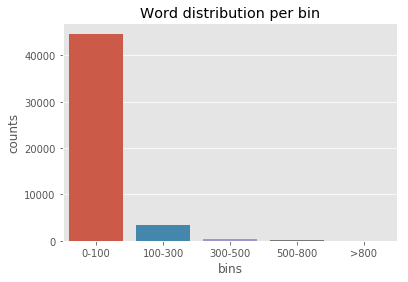

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [26]:
clean_tickets.head()

,Unnamed: 0,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,tokens,num_words,bins
0,0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4,"[hi, since, recruiter, lead, permission, appro...",12,0-100
1,1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4,"[icon, dear, please, setup, icon, per, icon, e...",15,0-100
2,2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4,"[work, experience, user, hi, work, experience,...",16,0-100
3,3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4,"[requesting, meeting, hi, please, help, follow...",11,0-100
4,4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4,"[re, expire, days, hi, ask, help, update, pass...",140,100-300


### Bag of Words Counts

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = clean_tickets["body"].tolist()
list_labels = clean_tickets["urgency"].tolist()
print(list_labels)

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

### Visualizing the embedings

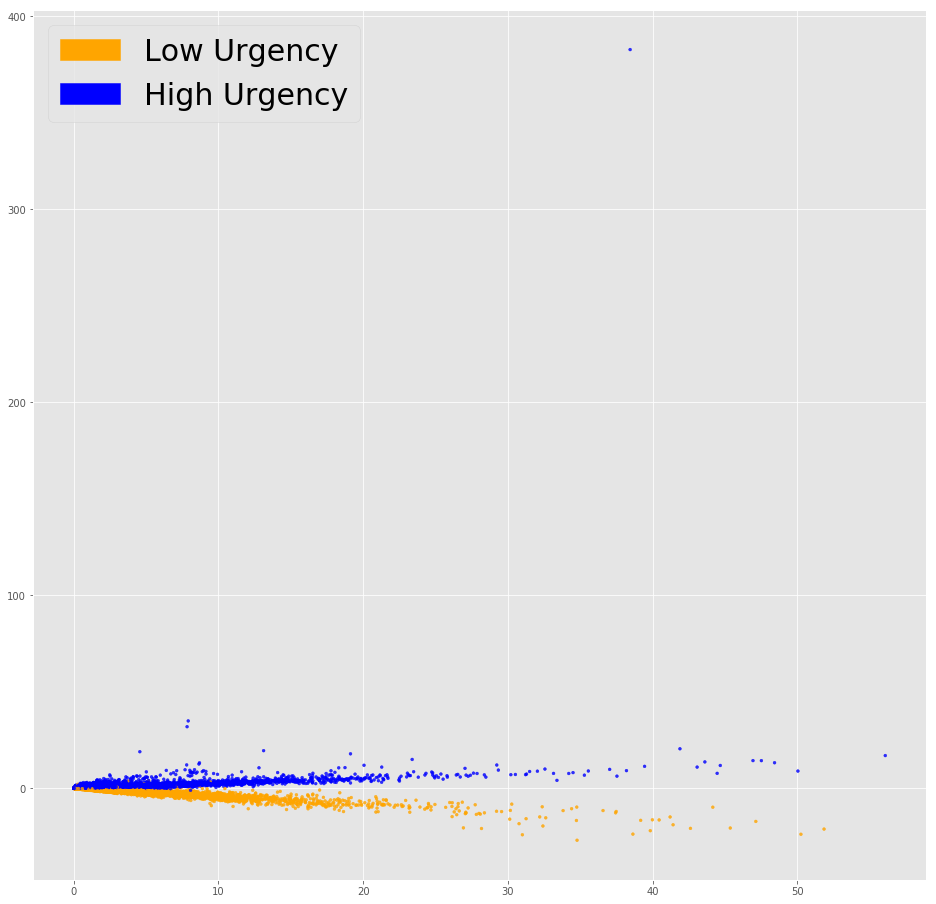

In [28]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','orange','orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Low Urgency')
            green_patch = mpatches.Patch(color='blue', label='High Urgency')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

##### In order to see whether our embeddings are capturing information that is relevant to our problem (i.e. whether the tickets are about low urgency or High Urgency), it is a good idea to visualize them and see if the classes look well separated. Since vocabularies are usually very large and visualizing data in 20,000 dimensions is impossible, techniques like PCA will help project the data down to two dimensions. This is plotted above.

#### From the above plot we can see that classes are very well seperated

### Fitting Logistic Regression classifier to just see how it works

In [29]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.851, precision = 0.856, recall = 0.851, f1 = 0.853


### Model Inspection Using Confusion Matrix

In [31]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

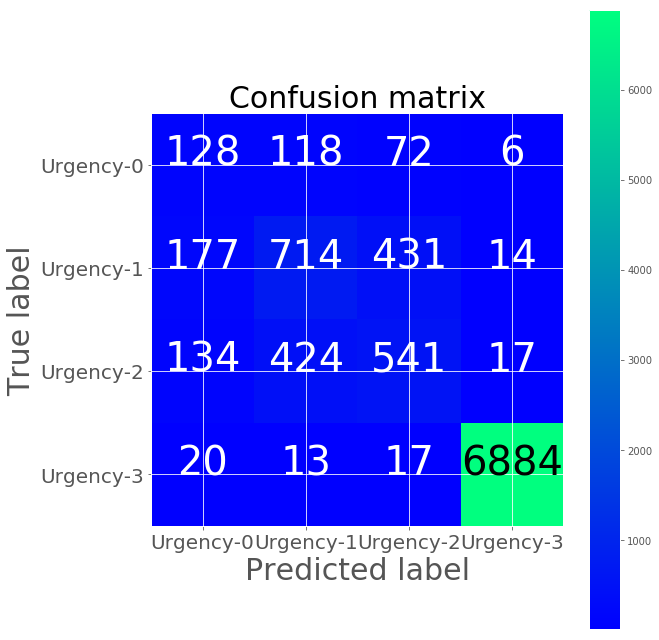

[[ 128  118   72    6]
 [ 177  714  431   14]
 [ 134  424  541   17]
 [  20   13   17 6884]]


In [32]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(9, 9))
plot = plot_confusion_matrix(cm, classes=['Urgency-0','Urgency-1','Urgency-2','Urgency-3'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

##### Logistic Regression struggling to classify Urgency 0,1 and 2. This is not surprising as Urgency 0,1,2 are undersampled. This is not very important because Urgency 0,1, and 2 are not so impartant as they are low urgency.

#### Let us look at the features(words) used in model to make decisions on Urgency

In [33]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


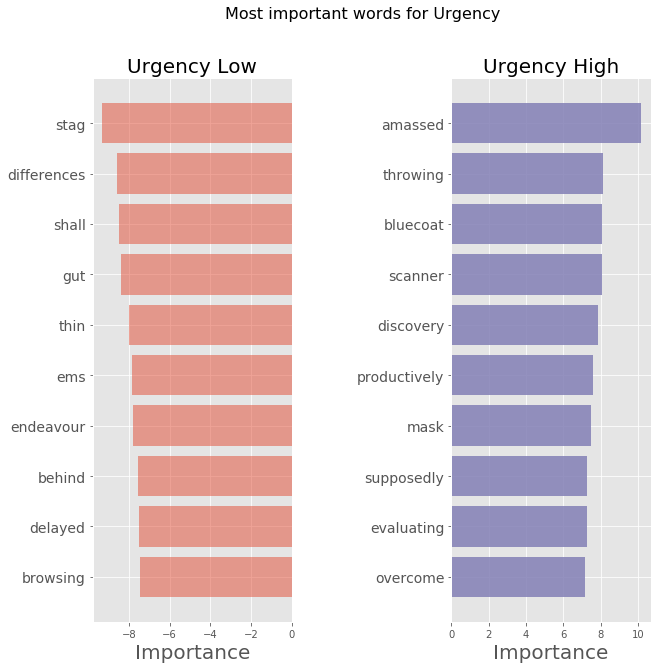

In [34]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Urgency Low', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Urgency 1', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Urgency 2', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Urgency High', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for Urgency")

### TFIDF Bag of Words

On top of our bag of words model, Let us use a TF-IDF (Term Frequency, Inverse Document Frequency) which means weighing words by how frequent they are in our dataset, discounting words that are too frequent, as they just add to the noise.

In [35]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

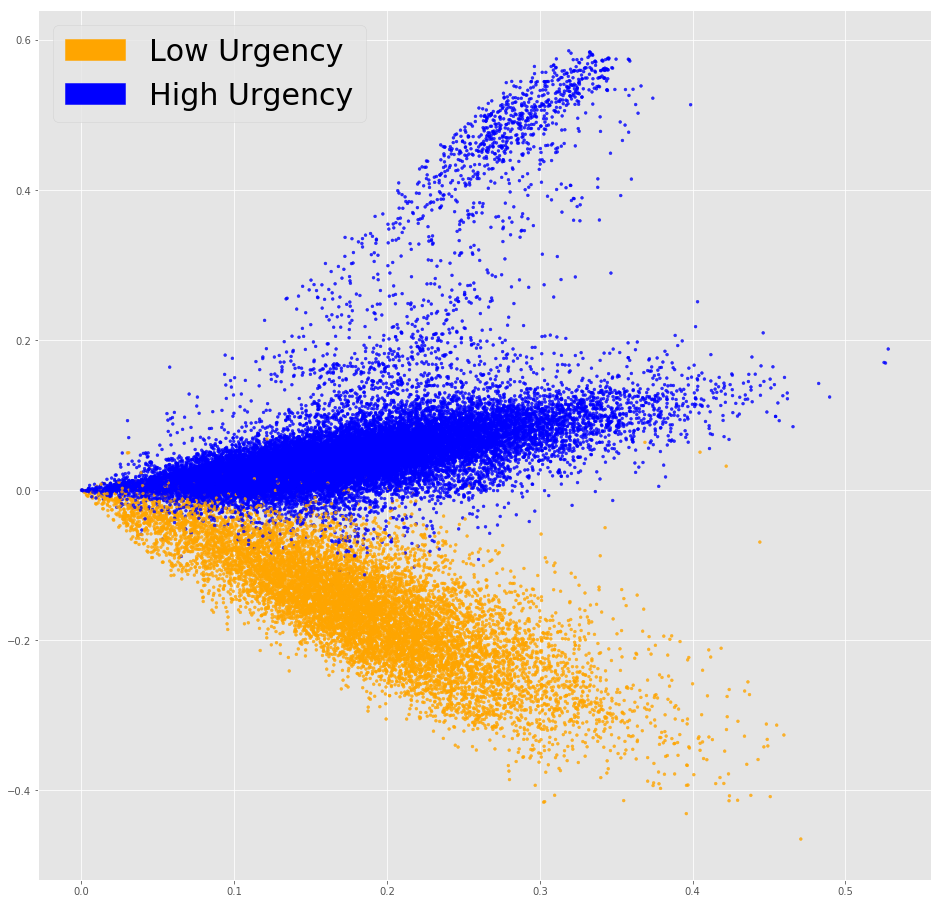

In [36]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

##### These embdings looks much more seperated than earlier embedings, let us see how TF-IDF performs

In [37]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [38]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.857, precision = 0.860, recall = 0.857, f1 = 0.859


##### Little more accuracy, precision, recall and f1 score when compared to previous model

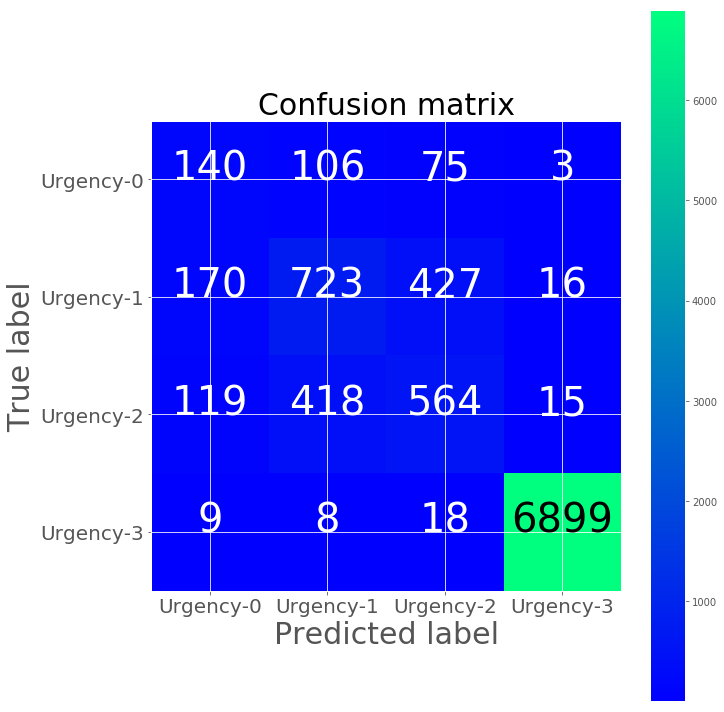

TFIDF confusion matrix
[[ 140  106   75    3]
 [ 170  723  427   16]
 [ 119  418  564   15]
 [   9    8   18 6899]]
Bag of Words confusion matrix
[[ 128  118   72    6]
 [ 177  714  431   14]
 [ 134  424  541   17]
 [  20   13   17 6884]]


In [39]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm2, classes=['Urgency-0','Urgency-1','Urgency-2','Urgency-3'], normalize=False, title='Confusion matrix')
plt.show()
print("TFIDF confusion matrix")
print(cm2)
print("Bag of Words confusion matrix")
print(cm)

#### False Possitives are reduced

In [40]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


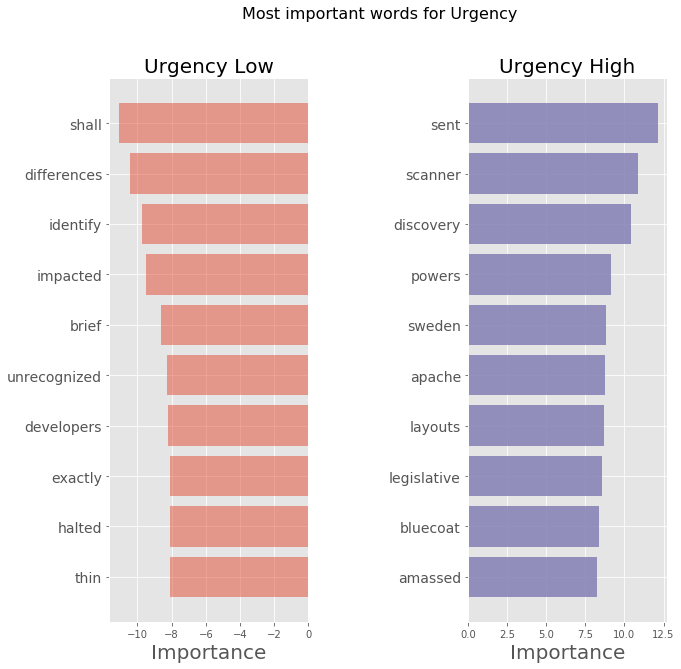

In [41]:
top_scores = [a[0] for a in importance_tfidf[1]['tops']]
top_words = [a[1] for a in importance_tfidf[1]['tops']]

bottom_scores = [a[0] for a in importance_tfidf[1]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[1]['bottom']]


plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for Urgency")

In [42]:
clean_tickets.head()

,Unnamed: 0,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,tokens,num_words,bins
0,0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4,"[hi, since, recruiter, lead, permission, appro...",12,0-100
1,1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4,"[icon, dear, please, setup, icon, per, icon, e...",15,0-100
2,2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4,"[work, experience, user, hi, work, experience,...",16,0-100
3,3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4,"[requesting, meeting, hi, please, help, follow...",11,0-100
4,4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4,"[re, expire, days, hi, ask, help, update, pass...",140,100-300


#### Setting the no of Classess and Target Variable

In [43]:
num_class = len(np.unique(clean_tickets.urgency.values))
y = clean_tickets['urgency'].values

In [44]:
y

array([3, 3, 3, ..., 2, 1, 2], dtype=int64)

### Tokenizing the Input

In [45]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

AttributeError: 'RegexpTokenizer' object has no attribute 'word_index'

###### The vocabulary in this case is a list of words that occurred in our text where each word has its own index.

In [47]:
max_features = 12259
maxlen = 500
tokenizer = Tokenizer(num_words=12259)
tokenizer.fit_on_texts(clean_tickets.body.values)
post_seq = tokenizer.texts_to_sequences(clean_tickets.body.values)
post_seq_padded = pad_sequences(post_seq, maxlen=maxlen)


##### Splitting the data into Test and Train

In [48]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.20)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38839, 500)
(9710, 500)
(38839,)
(9710,)


#### Using Embedding Layer and Classifier on the Tickets Data

In [50]:
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Sequential
model = Sequential() 
model.add(Embedding(12259, 8, input_length=maxlen))# Specifies the max input length to the embedding layer, 
                                                   #so we can latter flatten the embeded inputs,
                                                   # After Embedding Layer the activation will have shape of (samples, maxlen,8)
model.add(Flatten())# Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples,maxlen * 8)
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])


In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 8)            98072     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 16004     
Total params: 114,076
Trainable params: 114,076
Non-trainable params: 0
_________________________________________________________________


In [52]:
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=25, callbacks=[checkpointer])

Train on 29129 samples, validate on 9710 samples
Epoch 1/25
29129/29129 [==============================] - 3s 115us/step - loss: 0.4877 - acc: 0.7988 - val_loss: 0.3208 - val_acc: 0.8436

Epoch 00001: val_acc improved from -inf to 0.84356, saving model to weights-simple.hdf5
Epoch 2/25
29129/29129 [==============================] - 3s 102us/step - loss: 0.3039 - acc: 0.8480 - val_loss: 0.3032 - val_acc: 0.8488

Epoch 00002: val_acc improved from 0.84356 to 0.84882, saving model to weights-simple.hdf5
Epoch 3/25
29129/29129 [==============================] - 3s 108us/step - loss: 0.2816 - acc: 0.8602 - val_loss: 0.2981 - val_acc: 0.8513

Epoch 00003: val_acc improved from 0.84882 to 0.85129, saving model to weights-simple.hdf5
Epoch 4/25
29129/29129 [==============================] - 3s 109us/step - loss: 0.2612 - acc: 0.8780 - val_loss: 0.2949 - val_acc: 0.8553

Epoch 00004: val_acc improved from 0.85129 to 0.85530, saving model to weights-simple.hdf5
Epoch 5/25
29129/29129 [==========

#### Using Embedding Layer and a Classifier we got Validation accuracy of 0.86117

### Understanding the Model Fit

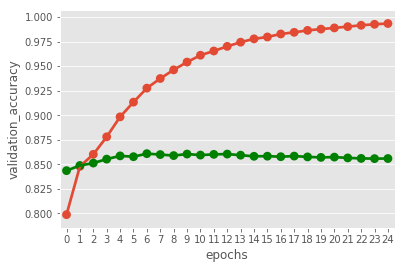

In [53]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

#### Plotting the results

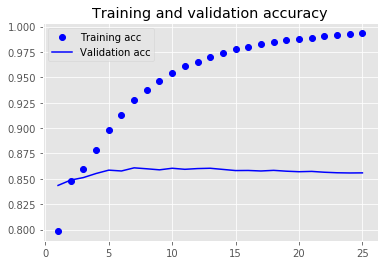

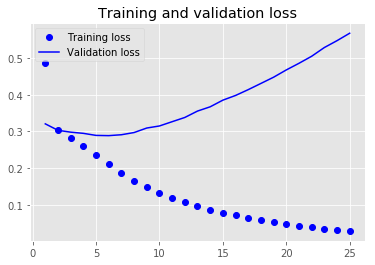

In [54]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [55]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

0.8480947476828012

In [95]:
y_test

array([2, 3, 3, ..., 1, 3, 3], dtype=int64)

In [96]:
predicted

array([1, 3, 3, ..., 1, 3, 3], dtype=int64)

In [97]:
model.evaluate(X_test,to_categorical(y_test))

9710/9710 [==============================] - 0s 37us/step


[0.5553786128912847, 0.8564366632460566]

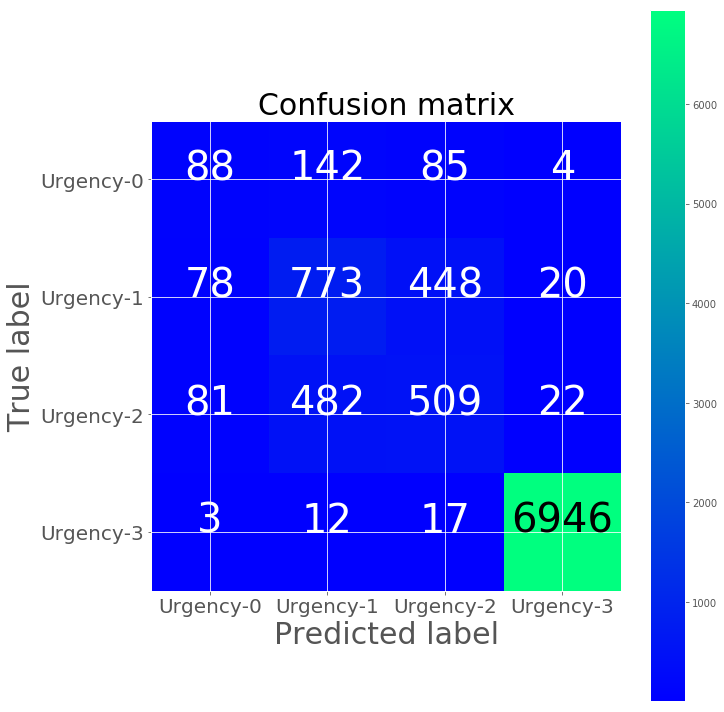

Embedding Layer Confusion Matrix
[[  88  142   85    4]
 [  78  773  448   20]
 [  81  482  509   22]
 [   3   12   17 6946]]
TFIDF confusion matrix
[[ 140  106   75    3]
 [ 170  723  427   16]
 [ 119  418  564   15]
 [   9    8   18 6899]]
Bag of Words confusion matrix
[[ 128  118   72    6]
 [ 177  714  431   14]
 [ 134  424  541   17]
 [  20   13   17 6884]]


In [98]:
cm3 = confusion_matrix(y_test, predicted)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm3, classes=['Urgency-0','Urgency-1','Urgency-2','Urgency-3'], normalize=False, title='Confusion matrix')
plt.show()
print("Embedding Layer Confusion Matrix")
print(cm3)
print("TFIDF confusion matrix")
print(cm2)
print("Bag of Words confusion matrix")
print(cm)

###### True Posstives are further increased with Embedded Model 
###### . Bag of Words True Possitives: 6884
###### . TFIDF on BOW True Possitives: 6899
###### . Embedded Model True Possitives: 6923

In [99]:
max_words = 12259
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))


In [100]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 100)          1225900   
_________________________________________________________________
flatten_2 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1600032   
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
Total params: 2,826,064
Trainable params: 2,826,064
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['acc'])

In [102]:
filepath="weights-simple-relu.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history_relu = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=25, callbacks=[checkpointer])

Train on 29129 samples, validate on 9710 samples
Epoch 1/25
29129/29129 [==============================] - 59s 2ms/step - loss: 0.4000 - acc: 0.8218 - val_loss: 0.3039 - val_acc: 0.8461

Epoch 00001: val_acc improved from -inf to 0.84614, saving model to weights-simple-relu.hdf5
Epoch 2/25
29129/29129 [==============================] - 57s 2ms/step - loss: 0.2736 - acc: 0.8642 - val_loss: 0.2918 - val_acc: 0.8554

Epoch 00002: val_acc improved from 0.84614 to 0.85541, saving model to weights-simple-relu.hdf5
Epoch 3/25
29129/29129 [==============================] - 57s 2ms/step - loss: 0.2297 - acc: 0.8956 - val_loss: 0.2937 - val_acc: 0.8608

Epoch 00003: val_acc improved from 0.85541 to 0.86076, saving model to weights-simple-relu.hdf5
Epoch 4/25
29129/29129 [==============================] - 57s 2ms/step - loss: 0.1760 - acc: 0.9279 - val_loss: 0.3281 - val_acc: 0.8566

Epoch 00004: val_acc did not improve from 0.86076
Epoch 5/25
29129/29129 [==============================] - 57s 2m

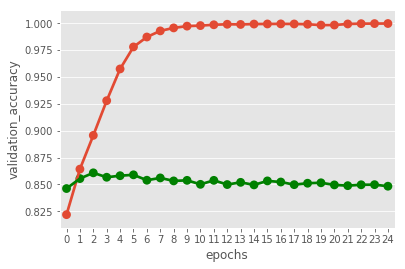

In [103]:
df = pd.DataFrame({'epochs':history_relu.epoch, 'accuracy': history_relu.history['acc'], 'validation_accuracy': history_relu.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

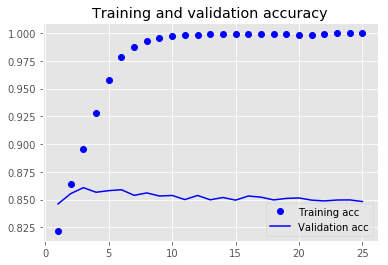

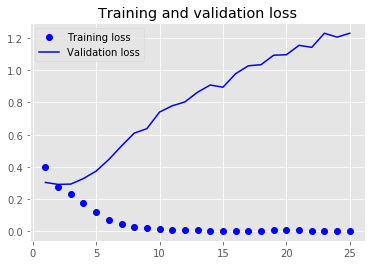

In [104]:
import matplotlib.pyplot as plt
acc = history_relu.history['acc']
val_acc = history_relu.history['val_acc']
loss = history_relu.history['loss']
val_loss = history_relu.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [96]:
model.load_weights('weights-simple-relu.hdf5')
predicted_relu = model.predict(X_test)
predicted_relu

array([[3.6804451e-07, 1.9658246e-09, 1.0269993e-08, 9.9999964e-01],
       [5.6919830e-11, 4.2689940e-09, 7.8061879e-07, 9.9999917e-01],
       [1.5660800e-06, 1.2375999e-07, 2.9780810e-07, 9.9999797e-01],
       ...,
       [2.4816124e-02, 5.8266836e-01, 3.9244962e-01, 6.5864100e-05],
       [8.1668401e-01, 1.5574792e-01, 2.7567908e-02, 1.9518804e-07],
       [1.9379788e-08, 3.3447833e-10, 5.3441840e-10, 1.0000000e+00]],
      dtype=float32)

In [97]:
# Understanding Softmax
predicted_relu = np.argmax(predicted_relu, axis=1)

In [98]:
predicted_relu

array([3, 3, 3, ..., 1, 0, 3], dtype=int64)

In [99]:
# Let us look at the accuracy
accuracy_score(y_test, predicted_relu)

0.86302780638517

In [102]:
scores = model.evaluate(X_test, to_categorical(y_test), verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.30%


In [104]:
accr = model.evaluate(X_test,to_categorical(y_test))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0]*100,accr[1]*100))

9710/9710 [==============================] - 5s 473us/step
Test set
  Loss: 34.451
  Accuracy: 86.303


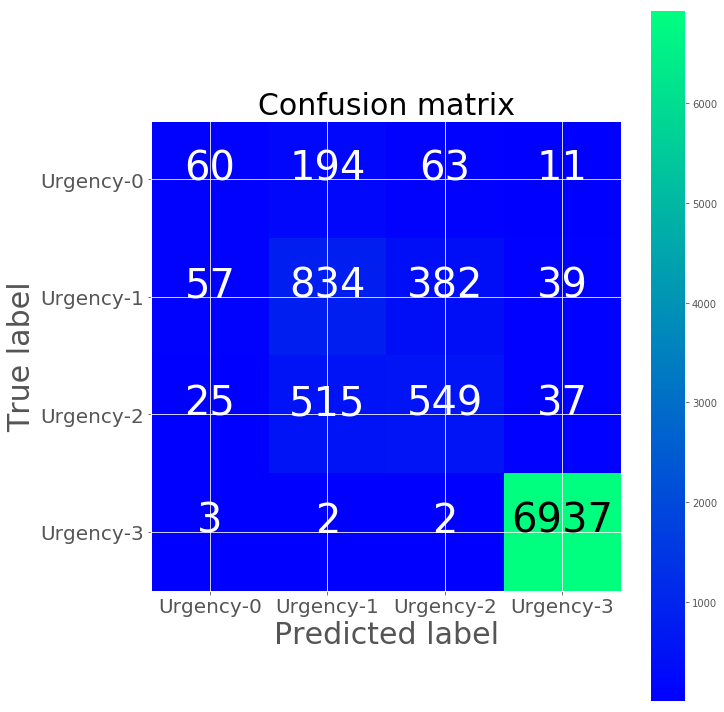

Embedding Layer with Relu Confusion Matrix
[[  60  194   63   11]
 [  57  834  382   39]
 [  25  515  549   37]
 [   3    2    2 6937]]
Embedding Layer Confusion Matrix
[[  95  122  105    6]
 [ 102  688  493   29]
 [  66  441  593   26]
 [   5    4   12 6923]]
TFIDF confusion matrix
[[ 140  106   75    3]
 [ 170  723  427   16]
 [ 119  418  564   15]
 [   9    8   18 6899]]
Bag of Words confusion matrix
[[ 128  118   72    6]
 [ 177  714  431   14]
 [ 134  424  541   17]
 [  20   13   17 6884]]


In [106]:
cm4 = confusion_matrix(y_test, predicted_relu)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm4, classes=['Urgency-0','Urgency-1','Urgency-2','Urgency-3'], normalize=False, title='Confusion matrix')
plt.show()
print("Embedding Layer with Relu Confusion Matrix")
print(cm4)
print("Embedding Layer Confusion Matrix")
print(cm3)
print("TFIDF confusion matrix")
print(cm2)
print("Bag of Words confusion matrix")
print(cm)

###### True Posstives are further increased with Embedded Model 
###### . Bag of Words True Possitives: 6884
###### . TFIDF on BOW True Possitives: 6899
###### . Embedded Model True Possitives: 6923
###### . Embedding Layer with Relu True Possitives: 6937

### Using Simple RNN

In [46]:
from keras.layers import SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(4, activation='softmax'))

NameError: name 'Sequential' is not defined

In [108]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [110]:
from keras.callbacks import EarlyStopping
filepath="weights-simpleRNN.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history_SimpleRNN = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=25, callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Train on 29129 samples, validate on 9710 samples
Epoch 1/25
29129/29129 [==============================] - 72s 2ms/step - loss: 0.5739 - acc: 0.7688 - val_loss: 0.3720 - val_acc: 0.8338
Epoch 2/25
29129/29129 [==============================] - 73s 2ms/step - loss: 0.3367 - acc: 0.8430 - val_loss: 0.3358 - val_acc: 0.8404
Epoch 3/25
29129/29129 [==============================] - 71s 2ms/step - loss: 0.3030 - acc: 0.8574 - val_loss: 0.3226 - val_acc: 0.8434
Epoch 4/25
29129/29129 [==============================] - 69s 2ms/step - loss: 0.2783 - acc: 0.8673 - val_loss: 0.3073 - val_acc: 0.8453
Epoch 5/25
29129/29129 [==============================] - 71s 2ms/step - loss: 0.2593 - acc: 0.8830 - val_loss: 0.3087 - val_acc: 0.8457
Epoch 6/25
29129/29129 [==============================] - 74s 3ms/step - loss: 0.2339 - acc: 0.8971 - val_loss: 0.3247 - val_acc: 0.8463
Epoch 7/25
29129/29129 [==============================] - 81s 3ms/step - loss: 0.2082 - acc: 0.9100 - val_loss: 0.3435 - val_acc:

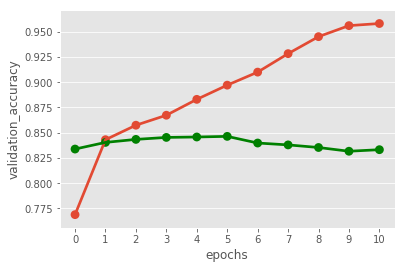

In [111]:
df = pd.DataFrame({'epochs':history_SimpleRNN.epoch, 'accuracy': history_SimpleRNN.history['acc'], 'validation_accuracy': history_SimpleRNN.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

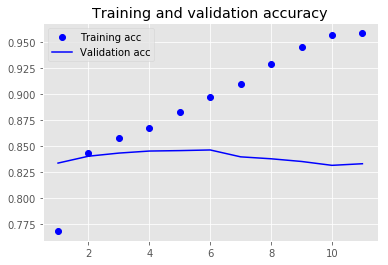

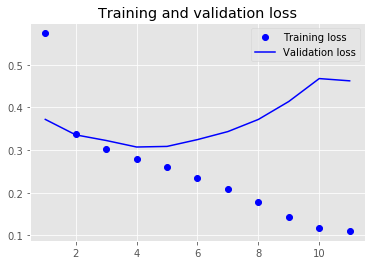

In [112]:
import matplotlib.pyplot as plt
acc = history_SimpleRNN.history['acc']
val_acc = history_SimpleRNN.history['val_acc']
loss = history_SimpleRNN.history['loss']
val_loss = history_SimpleRNN.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [116]:
predicted_simpleRNN = model.predict(X_test)
print(predicted_simpleRNN)

predicted_simpleRNN = np.argmax(predicted_simpleRNN, axis=1)

print(predicted_simpleRNN)

print(accuracy_score(y_test, predicted_simpleRNN))

accr = model.evaluate(X_test,to_categorical(y_test))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0]*100,accr[1]*100))

[[6.1387394e-04 1.3362973e-04 1.5948765e-03 9.9765766e-01]
 [1.5059339e-02 2.8203183e-04 6.6932671e-02 9.1772592e-01]
 [9.3981689e-06 3.0149365e-06 1.1052080e-05 9.9997652e-01]
 ...
 [1.7861074e-02 7.4332553e-01 2.3750615e-01 1.3071505e-03]
 [1.6237903e-01 3.5356647e-01 4.8405242e-01 2.0233792e-06]
 [3.8858263e-05 2.6707032e-06 2.4041281e-05 9.9993443e-01]]
[3 3 3 ... 1 2 3]
0.8360453141091658
9710/9710 [==============================] - 12s 1ms/step
Test set
  Loss: 45.274
  Accuracy: 83.605


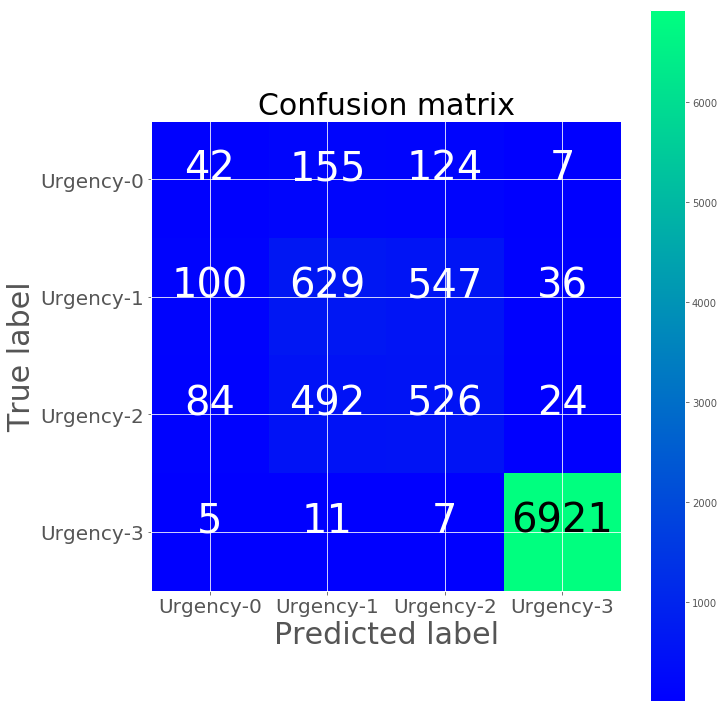

Embedding Layer with SimpleRNN Confusion Matrix
[[  42  155  124    7]
 [ 100  629  547   36]
 [  84  492  526   24]
 [   5   11    7 6921]]
Embedding Layer with Relu Confusion Matrix
[[  60  194   63   11]
 [  57  834  382   39]
 [  25  515  549   37]
 [   3    2    2 6937]]
Embedding Layer Confusion Matrix
[[  95  122  105    6]
 [ 102  688  493   29]
 [  66  441  593   26]
 [   5    4   12 6923]]
TFIDF confusion matrix
[[ 140  106   75    3]
 [ 170  723  427   16]
 [ 119  418  564   15]
 [   9    8   18 6899]]
Bag of Words confusion matrix
[[ 128  118   72    6]
 [ 177  714  431   14]
 [ 134  424  541   17]
 [  20   13   17 6884]]


In [117]:
cm5 = confusion_matrix(y_test, predicted_simpleRNN)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm5, classes=['Urgency-0','Urgency-1','Urgency-2','Urgency-3'], normalize=False, title='Confusion matrix')
plt.show()
print("Embedding Layer with SimpleRNN Confusion Matrix")
print(cm5)
print("Embedding Layer with Relu Confusion Matrix")
print(cm4)
print("Embedding Layer Confusion Matrix")
print(cm3)
print("TFIDF confusion matrix")
print(cm2)
print("Bag of Words confusion matrix")
print(cm)

## Using the LSTM Layer

In [118]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(4, activation='softmax'))

In [119]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
                metrics=['acc'])

In [ ]:
filepath="weights-simple-LSTM.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history_relu = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=10, callbacks=[checkpointer])

Train on 29129 samples, validate on 9710 samples
Epoch 1/10
 9664/29129 [========>.....................] - ETA: 2:16 - loss: 0.6355 - acc: 0.7618